# Data Exploration

## Testing

In [1]:
# imports
import requests
import pandas as pd
from matplotlib import pyplot as plt
import datetime

In [2]:
df20 = pd.read_csv('input/2020-08-20_sds011_sensor_6842.csv', sep=';')
df21 = pd.read_csv('input/2020-08-21_sds011_sensor_6842.csv', sep=';')
df22 = pd.read_csv('input/2020-08-22_sds011_sensor_6842.csv', sep=';')
df23 = pd.read_csv('input/2020-08-23_sds011_sensor_6842.csv', sep=';')
df24 = pd.read_csv('input/2020-08-24_sds011_sensor_6842.csv', sep=';')

In [3]:
df20

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-20T00:01:37,4.47,NaN,NaN,1.50,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-20T00:04:09,3.87,NaN,NaN,1.23,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-20T00:06:41,2.20,NaN,NaN,1.23,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-20T00:09:12,2.83,NaN,NaN,1.30,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-20T00:11:44,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
562,6842,SDS011,3460,52.028,8.916,2020-08-20T23:47:15,1.50,NaN,NaN,1.00,NaN,NaN
563,6842,SDS011,3460,52.028,8.916,2020-08-20T23:49:47,1.83,NaN,NaN,1.00,NaN,NaN
564,6842,SDS011,3460,52.028,8.916,2020-08-20T23:52:23,2.20,NaN,NaN,1.37,NaN,NaN
565,6842,SDS011,3460,52.028,8.916,2020-08-20T23:54:54,2.77,NaN,NaN,1.27,NaN,NaN


In [4]:
df20['timestamp'] = pd.to_datetime(df20['timestamp'])
df21['timestamp'] = pd.to_datetime(df21['timestamp'])
df22['timestamp'] = pd.to_datetime(df22['timestamp'])
df23['timestamp'] = pd.to_datetime(df23['timestamp'])
df24['timestamp'] = pd.to_datetime(df24['timestamp'])

In [5]:
df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df20 = df20.set_index('timestamp')
df = df.set_index('timestamp')
#df = pd.concat([df20, df21, df22, df23, df24], axis = 0)
#df = df20.copy()

In [6]:
df

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-20 00:01:37,6842,SDS011,3460,52.028,8.916,4.47,NaN,NaN,1.50,NaN,NaN
2020-08-20 00:04:09,6842,SDS011,3460,52.028,8.916,3.87,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:06:41,6842,SDS011,3460,52.028,8.916,2.20,NaN,NaN,1.23,NaN,NaN
2020-08-20 00:09:12,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.30,NaN,NaN
2020-08-20 00:11:44,6842,SDS011,3460,52.028,8.916,4.10,NaN,NaN,1.50,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24 23:49:53,6842,SDS011,3460,52.028,8.916,12.30,NaN,NaN,9.23,NaN,NaN
2020-08-24 23:52:24,6842,SDS011,3460,52.028,8.916,12.53,NaN,NaN,10.10,NaN,NaN
2020-08-24 23:54:56,6842,SDS011,3460,52.028,8.916,12.87,NaN,NaN,10.40,NaN,NaN


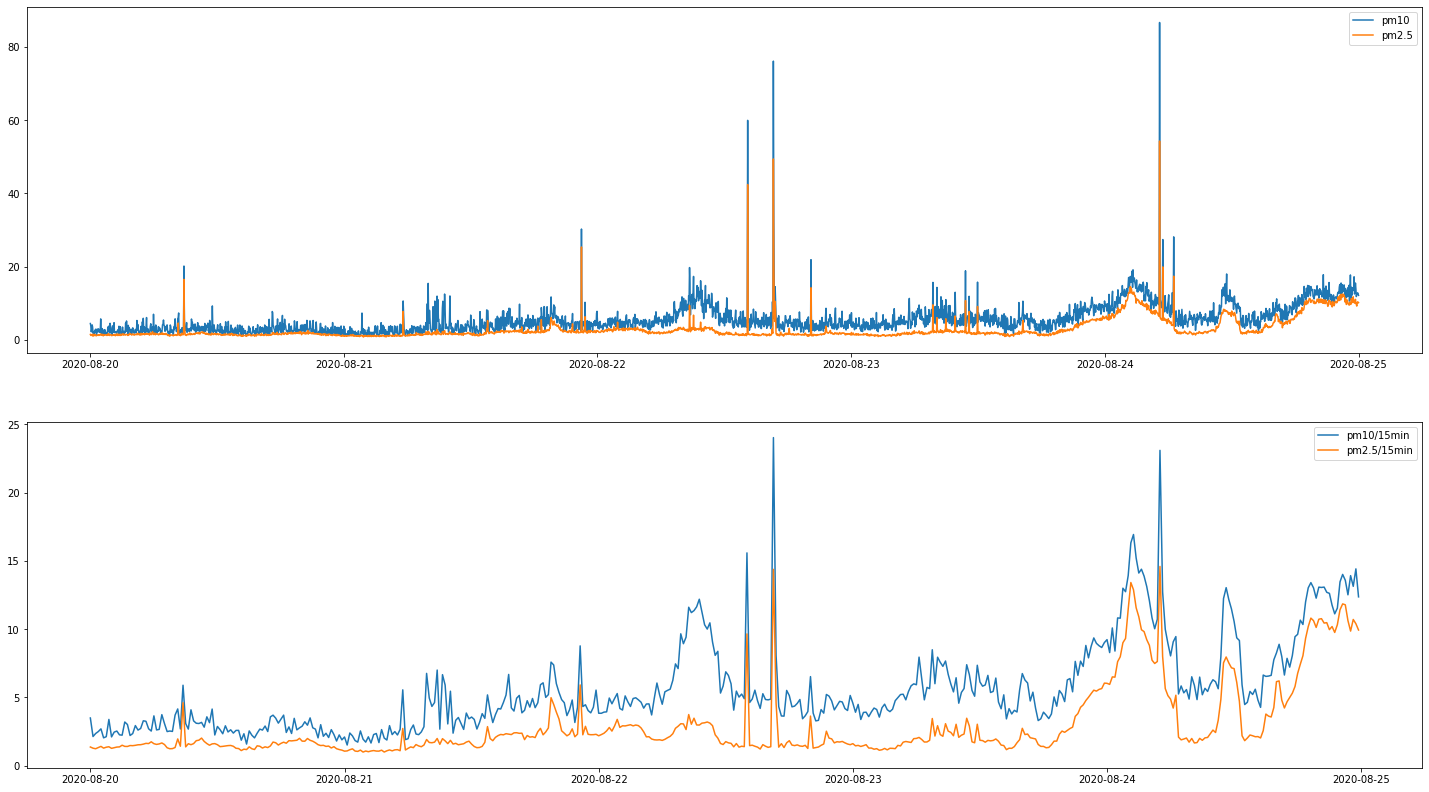

In [7]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(df['P1'], '-', label = 'pm10')
plt.plot(df['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 15
df = df.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(df['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(df['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

# Getting Data

In [8]:
date = datetime.datetime.strptime('2020-08-01', '%Y-%m-%d').date()
test = []
while date < datetime.datetime.now().date():
    d = date.strftime('%Y-%m-%d')
    print(d)
    try:
        test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_6842.csv', sep = ';'))
    except:
        print("\tdoes not exist jet")
    date += datetime.timedelta(days = 1)

2020-08-01
2020-08-02
2020-08-03
2020-08-04
2020-08-05
2020-08-06
2020-08-07
2020-08-08
2020-08-09
2020-08-10
2020-08-11
2020-08-12
2020-08-13
2020-08-14
2020-08-15
2020-08-16
2020-08-17
2020-08-18
2020-08-19
2020-08-20
2020-08-21
2020-08-22
2020-08-23
2020-08-24
2020-08-25
2020-08-26
2020-08-27
2020-08-28
2020-08-29
2020-08-30
2020-08-31
2020-09-01


In [9]:
comp = test[0]
for i in range(1, len(test)):
    comp = pd.concat([comp, test[i]], axis = 0)
del test

In [10]:
comp

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,6842,SDS011,3460,52.028,8.916,2020-08-01T00:01:36,3.93,NaN,NaN,2.00,NaN,NaN
1,6842,SDS011,3460,52.028,8.916,2020-08-01T00:04:07,4.67,NaN,NaN,2.10,NaN,NaN
2,6842,SDS011,3460,52.028,8.916,2020-08-01T00:06:39,2.83,NaN,NaN,1.80,NaN,NaN
3,6842,SDS011,3460,52.028,8.916,2020-08-01T00:09:14,7.00,NaN,NaN,1.90,NaN,NaN
4,6842,SDS011,3460,52.028,8.916,2020-08-01T00:11:49,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
474,6842,SDS011,3460,52.028,8.916,2020-09-01T23:49:34,2.47,NaN,NaN,2.13,NaN,NaN
475,6842,SDS011,3460,52.028,8.916,2020-09-01T23:52:04,2.10,NaN,NaN,1.90,NaN,NaN
476,6842,SDS011,3460,52.028,8.916,2020-09-01T23:54:30,2.30,NaN,NaN,2.10,NaN,NaN
477,6842,SDS011,3460,52.028,8.916,2020-09-01T23:56:57,2.40,NaN,NaN,1.97,NaN,NaN


In [11]:
comp.describe()

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
count,17636.0,17636.0,1.763600e+04,1.763600e+04,17636.000000,0.0,0.0,17636.000000,0.0,0.0
mean,6842.0,3460.0,5.202800e+01,8.916000e+00,7.103566,NaN,NaN,4.775218,NaN,NaN
std,0.0,0.0,1.421126e-14,1.776407e-15,6.326082,NaN,NaN,5.340499,NaN,NaN
min,6842.0,3460.0,5.202800e+01,8.916000e+00,0.400000,NaN,NaN,0.400000,NaN,NaN
25%,6842.0,3460.0,5.202800e+01,8.916000e+00,3.530000,NaN,NaN,1.530000,NaN,NaN
50%,6842.0,3460.0,5.202800e+01,8.916000e+00,5.670000,NaN,NaN,2.650000,NaN,NaN
75%,6842.0,3460.0,5.202800e+01,8.916000e+00,8.830000,NaN,NaN,6.530000,NaN,NaN
max,6842.0,3460.0,5.202800e+01,8.916000e+00,226.620000,NaN,NaN,177.980000,NaN,NaN


In [12]:
comp['timestamp'] = pd.to_datetime(comp['timestamp'])
comp = comp.set_index('timestamp')

In [13]:
comp

,sensor_id,sensor_type,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,,
2020-08-01 00:01:36,6842,SDS011,3460,52.028,8.916,3.93,NaN,NaN,2.00,NaN,NaN
2020-08-01 00:04:07,6842,SDS011,3460,52.028,8.916,4.67,NaN,NaN,2.10,NaN,NaN
2020-08-01 00:06:39,6842,SDS011,3460,52.028,8.916,2.83,NaN,NaN,1.80,NaN,NaN
2020-08-01 00:09:14,6842,SDS011,3460,52.028,8.916,7.00,NaN,NaN,1.90,NaN,NaN
2020-08-01 00:11:49,6842,SDS011,3460,52.028,8.916,3.63,NaN,NaN,1.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-09-01 23:49:34,6842,SDS011,3460,52.028,8.916,2.47,NaN,NaN,2.13,NaN,NaN
2020-09-01 23:52:04,6842,SDS011,3460,52.028,8.916,2.10,NaN,NaN,1.90,NaN,NaN
2020-09-01 23:54:30,6842,SDS011,3460,52.028,8.916,2.30,NaN,NaN,2.10,NaN,NaN


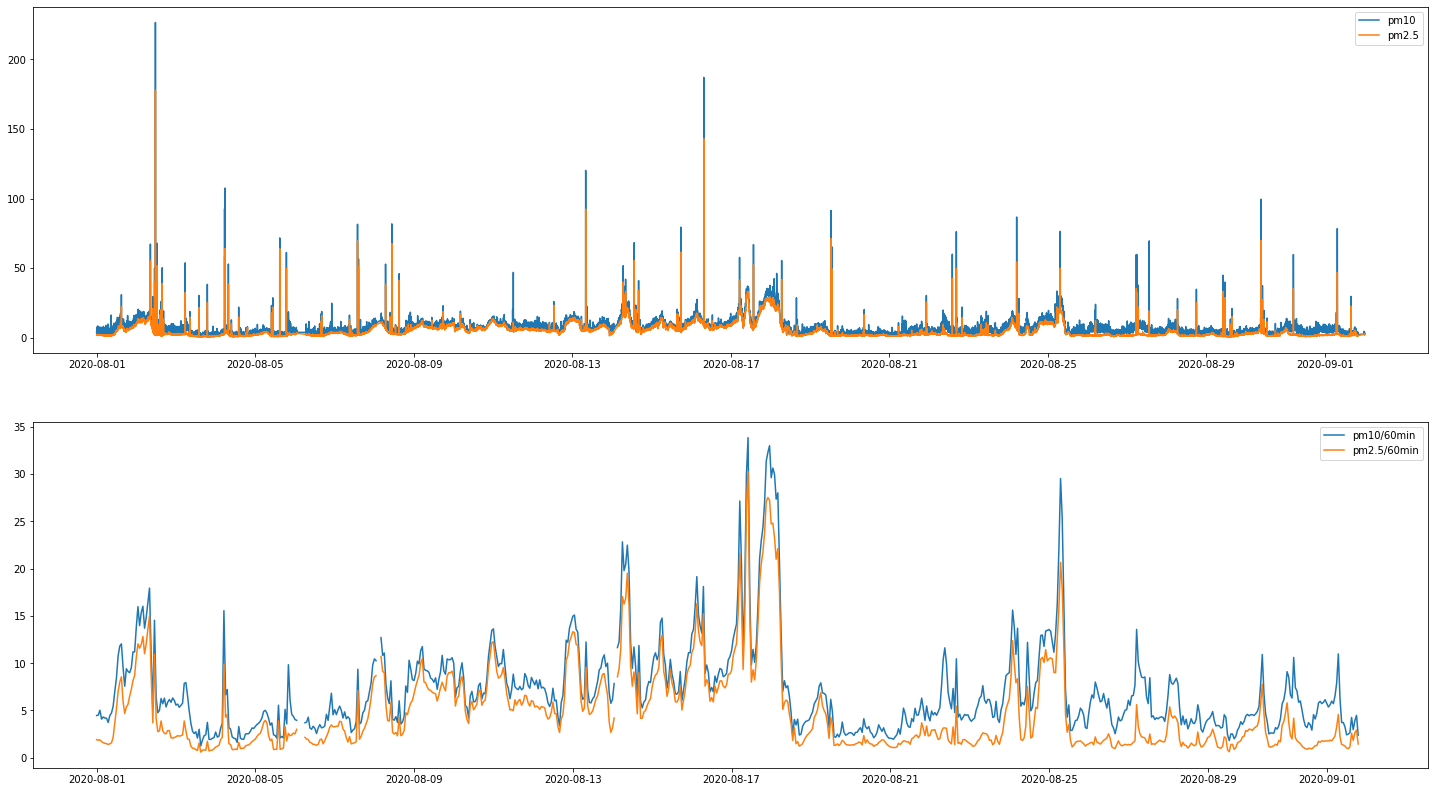

In [14]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp['P1'], '-', label = 'pm10')
plt.plot(comp['P2'], '-', label = 'pm2.5')
plt.legend()


resampleTime = 60
comp2 = comp.resample(f'{resampleTime}min').mean()
plt.subplot(212)
plt.plot(comp2['P1'], '-', label = f'pm10/{resampleTime}min')
plt.plot(comp2['P2'], '-', label = f'pm2.5/{resampleTime}min')
plt.legend()

plt.show()

In [15]:
comp2[comp2.index >'2020-08-26']

,sensor_id,location,lat,lon,P1,durP1,ratioP1,P2,durP2,ratioP2
timestamp,,,,,,,,,,
2020-08-26 01:00:00,6842.0,3460.0,52.028,8.916,5.848696,NaN,NaN,1.580000,NaN,NaN
2020-08-26 02:00:00,6842.0,3460.0,52.028,8.916,6.637083,NaN,NaN,1.629167,NaN,NaN
2020-08-26 03:00:00,6842.0,3460.0,52.028,8.916,6.297917,NaN,NaN,1.357917,NaN,NaN
2020-08-26 04:00:00,6842.0,3460.0,52.028,8.916,8.000455,NaN,NaN,2.193636,NaN,NaN
2020-08-26 05:00:00,6842.0,3460.0,52.028,8.916,7.384762,NaN,NaN,1.619524,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-09-01 19:00:00,6842.0,3460.0,52.028,8.916,2.380000,NaN,NaN,1.446250,NaN,NaN
2020-09-01 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-01 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


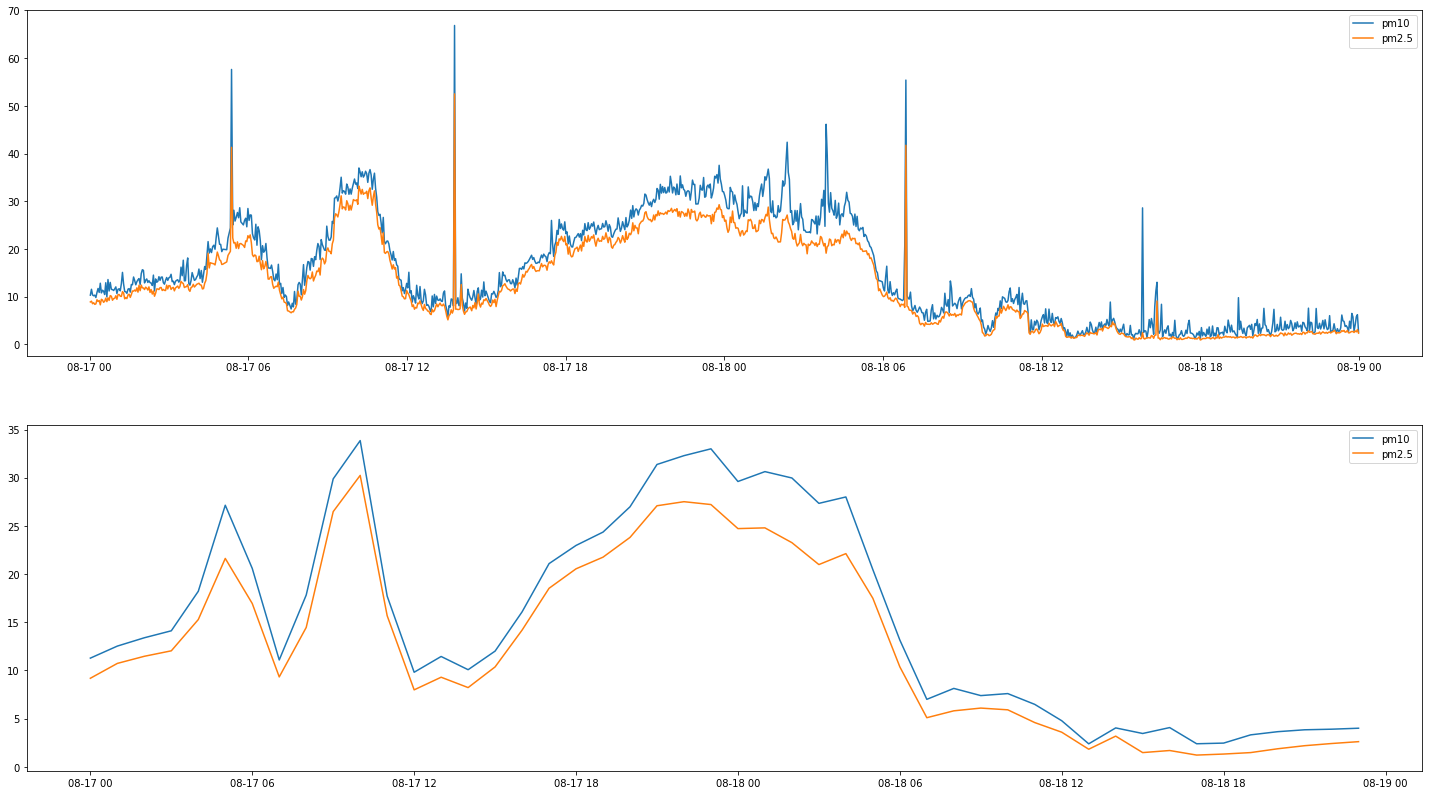

In [16]:
plt.figure(figsize = [25, 14])

plt.subplot(211)
plt.plot(comp.loc['2020-08-17':'2020-08-18']['P1'], '-', label = 'pm10')
plt.plot(comp.loc['2020-08-17':'2020-08-18']['P2'], '-', label = 'pm2.5')
plt.legend()

plt.subplot(212)
plt.plot(comp2.loc['2020-08-17':'2020-08-18']['P1'], '-', label = 'pm10')
plt.plot(comp2.loc['2020-08-17':'2020-08-18']['P2'], '-', label = 'pm2.5')
plt.legend()

plt.show()

In [22]:
SensorList = [line.rstrip('\n') for line in open("SensorList.txt")]

In [23]:
SensorList

['29366',
 '10410',
 '19004',
 '30685',
 '22543',
 '3859',
 '22725',
 '1691',
 '25343',
 '48689',
 '539',
 '1180',
 '5221',
 '10029',
 '26277',
 '16954',
 '8474',
 '1226',
 '2187',
 '3054',
 '11608',
 '33026',
 '43366',
 '3597',
 '11222',
 '11224',
 '9547',
 '564',
 '31035',
 '4857']

In [30]:
SensorData = {}
for sensor in SensorList:
    print(sensor)
    date = datetime.datetime.strptime('2020-08-31', '%Y-%m-%d').date()
    test = []
    comp = []
    while date < datetime.datetime.now().date():
        d = date.strftime('%Y-%m-%d')
        print(d)
        try:
            test.append(pd.read_csv(f'https://archive.sensor.community/{d}/{d}_sds011_sensor_{sensor}.csv', sep = ';'))
        except:
            print("\tdoes not exist jet")
        date += datetime.timedelta(days = 1)
    try:
        comp = test[0]
        for i in range(1, len(test)):
            comp = pd.concat([comp, test[i]], axis = 0)
    except:
        print("\tno data")
    SensorData[sensor] = comp

29366
2020-08-31
2020-09-01
10410
2020-08-31
2020-09-01
19004
2020-08-31
2020-09-01
30685
2020-08-31
2020-09-01
22543
2020-08-31
2020-09-01
3859
2020-08-31
2020-09-01
22725
2020-08-31
2020-09-01
1691
2020-08-31
2020-09-01
25343
2020-08-31
2020-09-01
48689
2020-08-31
2020-09-01
539
2020-08-31
2020-09-01
1180
2020-08-31
2020-09-01
5221
2020-08-31
2020-09-01
10029
2020-08-31
2020-09-01
26277
2020-08-31
2020-09-01
16954
2020-08-31
2020-09-01
8474
2020-08-31
2020-09-01
1226
2020-08-31
2020-09-01
2187
2020-08-31
2020-09-01
3054
2020-08-31
2020-09-01
11608
2020-08-31
2020-09-01
33026
2020-08-31
2020-09-01
43366
2020-08-31
	does not exist jet
2020-09-01
	does not exist jet
	no data
3597
2020-08-31
2020-09-01
11222
2020-08-31
2020-09-01
11224
2020-08-31
2020-09-01
9547
2020-08-31
2020-09-01
564
2020-08-31
2020-09-01
31035
2020-08-31
	does not exist jet
2020-09-01
	does not exist jet
	no data
4857
2020-08-31
2020-09-01


In [31]:
SensorData['4857']

,sensor_id,sensor_type,location,lat,lon,timestamp,P1,durP1,ratioP1,P2,durP2,ratioP2
0,4857,SDS011,2443,51.978,8.472,2020-08-31T00:02:54,8.00,NaN,NaN,4.35,NaN,NaN
1,4857,SDS011,2443,51.978,8.472,2020-08-31T00:08:03,7.93,NaN,NaN,3.95,NaN,NaN
2,4857,SDS011,2443,51.978,8.472,2020-08-31T00:13:11,7.05,NaN,NaN,3.17,NaN,NaN
3,4857,SDS011,2443,51.978,8.472,2020-08-31T00:23:26,11.70,NaN,NaN,3.12,NaN,NaN
4,4857,SDS011,2443,51.978,8.472,2020-08-31T00:28:33,8.85,NaN,NaN,2.87,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
202,4857,SDS011,2443,51.978,8.472,2020-09-01T23:39:54,2.17,NaN,NaN,1.20,NaN,NaN
203,4857,SDS011,2443,51.978,8.472,2020-09-01T23:44:50,1.80,NaN,NaN,1.52,NaN,NaN
204,4857,SDS011,2443,51.978,8.472,2020-09-01T23:49:46,3.85,NaN,NaN,1.40,NaN,NaN
205,4857,SDS011,2443,51.978,8.472,2020-09-01T23:54:42,2.55,NaN,NaN,1.65,NaN,NaN
